

![SVG from www](https://upload.wikimedia.org/wikipedia/commons/thumb/a/a2/Kühne_Logistics_University_logo_2019.svg/100px-Kühne_Logistics_University_logo_2019.svg.png)  
# Python Basics course September 2022  
### Kuehne Logistics University  

## Session 4: Introduction to data manipulation using the Numpy and Pandas library

In this session we will start with data manipulation with Python. Recall how in session 1 we briefly discussed the software framework that's often used by programmes written in Python. Central to functionality in Python are the Libraries. One of such library, which is the go-to one to do anything related to data manipulation is called Pandas. Besides the the quick introduction that we're giving you here, Pandas has innumerable number of methods that we won't be able to disucss here. The more extensive user guide however can be found [here](https://pandas.pydata.org/docs/user_guide/index.html#user-guide).

![](Figures/SoftwareLogic.png)



## The Pandas DataFrame

Central to working with Pandas is the format in which data is stored. This format is called `DataFrame`. You could compare this to storing data in an Excel spreadsheet. Namely, the way and the options of manipulations you have at your disposal, are the ones that Excel provides to you. Very similarly, a `DataFrame` allows you to manipulate data in a certain way. Another example of datatype-based methods in Python are the `String` methods, discussed in Session 2. 

![](Figures/DF_Example.png)

Before doing anything, we have to load the Pandas libraries into our kernel. This is done with the `import` statement. The `as` statement assigns an abbreviation to the name of the library. That way,we don't have to type the full name before calling a method from that particular library. 



In [2]:
import pandas as pd

The easy way to construct a DataFrame is to "feed" it with a `dictionary`. A dictionary is a Python-native way of storing data. A dictionary is initiated as follows: 
`{index:data}`. In the example below, we saved data on the brand, model and production years of a car. This can then be accessed through the index name.

__Note:__ we can assign different types of data in one dictionary

In [4]:
thisdict = {
  "brand": "Ford",
  "model": "Mustang",
  "year": [1964,1965,1966]
}
print(thisdict["brand"]) # Printing the brand name
print(thisdict["year"]) # Printing the LIST of years of production

Ford
[1964, 1965, 1966]


Now, getting back to the constructing a `DataFrame`. One is constructed by calling the method `pandas.DataFrame()`. (In this case it's called with `pd.DataFrame()`, because we abbreviated Pandas with pd with the `as` statement). 

In [5]:
# Construct a dictionary 
cars = {'Brand': ['Honda', 'Toyota', 'Ford', 'Audi','Honda','Audi'], 'Price': [22000, 25000, 27000, 35000,30000,10000]}

# Make it into a DataFrame
df = pd.DataFrame(cars)

# Display the DataFrame
df

,Brand,Price
0,Honda,22000
1,Toyota,25000
2,Ford,27000
3,Audi,35000
4,Honda,30000
5,Audi,10000


We can also tell it to only select the data with the index name `Price`. 

In [6]:
df = pd.DataFrame(cars, columns = ['Price'])

df

,Price
0,22000
1,25000
2,27000
3,35000
4,30000
5,10000


The `.describe()` method gives a small summary for each of the numeric columns. 

In [7]:
df = pd.DataFrame(cars)
df['Price'].describe()

count        6.000000
mean     24833.333333
std       8518.607085
min      10000.000000
25%      22750.000000
50%      26000.000000
75%      29250.000000
max      35000.000000
Name: Price, dtype: float64

We can also add a column, simply as follows: 

__Note__: the added column has to be the same length as the DataFrame to which it is added. 

In [8]:
df['Color'] = ['green', 'blue', 'green', 'red','black','yellow']
df

,Brand,Price,Color
0,Honda,22000,green
1,Toyota,25000,blue
2,Ford,27000,green
3,Audi,35000,red
4,Honda,30000,black
5,Audi,10000,yellow


### Selecting columns and rows
A selection for a column can be made by subselecting the name of the column as follows:

In [9]:
df["Brand"]

0     Honda
1    Toyota
2      Ford
3      Audi
4     Honda
5      Audi
Name: Brand, dtype: object

Then we can select one entry based on the index value:

In [10]:
df["Brand"][0]

'Honda'

Note that this does not work for the "whole" DataFrame.To do so, we need the `.loc` argument, using as follows:

In [11]:
df.loc[0,"Brand"]

'Honda'

We can also approach the DataFrame as a "simple" matrix, from which we select a row and a column, using the `.iloc[row,column]` statement. Recall how we can select data entries from a list. Now, we have to do it in two dimensions, due to the matrix shape of a DataFrame.
![](Figures/hello.png)

In [12]:
df.iloc[0,0]

'Honda'

Subsequently, for a list we can use the `:`, as follows:

In [13]:
df.iloc[0:2,0:3]

,Brand,Price,Color
0,Honda,22000,green
1,Toyota,25000,blue


In order to __save__ a subset of a DataFrame we want to work further with, we have to assign a new variable name (or overwrite). 

In [14]:
subset = df.iloc[0:2,0:3]
subset

,Brand,Price,Color
0,Honda,22000,green
1,Toyota,25000,blue


### Working with Pokedata
Practically, we would like work with datasets that we don't create ourselves, but acquire externally. For the examples, we acquire a dataset from the following GitHub
https://github.com/KeithGalli/pandas

With all kinds of information about Pokémons. The information is stored in a "comma-separated values" file (.csv). This a very common smaller and bigger datasets. 

First, we start with loading the data using the `pandas.read_csv()` method. The input is a string with the location of the data file. This can be retrieved using the command `%pwd`, which returns the address of the so-called working directory. 

In [15]:
%pwd

'/Users/falk.freese/OneDrive - Kühne Logistics University/Documents/Courses/Python Class/Python Class'

In [18]:
## Larger datasets: Pokemons 
pwd = %pwd
#poke_data = pd.read_csv(pwd+"\\pokemon_data.csv")
poke_data = pd.read_csv(pwd+"/pokemon_data.csv")

Using the `.head()` and `.tail()` functions yields us an easy initial exploreation of the first and last rows of our dataset

In [20]:
poke_data.head(4)

,#,Name,Type 1,Type 2,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary
0,1,Bulbasaur,Grass,Poison,45,49,49,65,65,45,1,False
1,2,Ivysaur,Grass,Poison,60,62,63,80,80,60,1,False
2,3,Venusaur,Grass,Poison,80,82,83,100,100,80,1,False
3,3,VenusaurMega Venusaur,Grass,Poison,80,100,123,122,120,80,1,False


In [21]:
poke_data.tail(5)

,#,Name,Type 1,Type 2,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary
795,719,Diancie,Rock,Fairy,50,100,150,100,150,50,6,True
796,719,DiancieMega Diancie,Rock,Fairy,50,160,110,160,110,110,6,True
797,720,HoopaHoopa Confined,Psychic,Ghost,80,110,60,150,130,70,6,True
798,720,HoopaHoopa Unbound,Psychic,Dark,80,160,60,170,130,80,6,True
799,721,Volcanion,Fire,Water,80,110,120,130,90,70,6,True


The `len()` method can be used to see the number of rows of a dataset

In [22]:
len(poke_data)

800

And, again, the `.describe()` method to see a brief description of our columns with numeric data. 

In [23]:
poke_data.describe()

,#,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation
count,800.000000,800.000000,800.000000,800.000000,800.000000,800.000000,800.000000,800.00000
mean,362.813750,69.258750,79.001250,73.842500,72.820000,71.902500,68.277500,3.32375
std,208.343798,25.534669,32.457366,31.183501,32.722294,27.828916,29.060474,1.66129
min,1.000000,1.000000,5.000000,5.000000,10.000000,20.000000,5.000000,1.00000
25%,184.750000,50.000000,55.000000,50.000000,49.750000,50.000000,45.000000,2.00000
50%,364.500000,65.000000,75.000000,70.000000,65.000000,70.000000,65.000000,3.00000
75%,539.250000,80.000000,100.000000,90.000000,95.000000,90.000000,90.000000,5.00000
max,721.000000,255.000000,190.000000,230.000000,194.000000,230.000000,180.000000,6.00000


### Selecting data

Besides the examples that were given with the small dataset about cars, we also have more sophisticated ways of selecting the data, based on the information _in_ the data itself. The basis of this is a list of Boolean (recall: `True` or `False`), representing whether we want to select something, or not. 

Taking the small example of comparing the Name column in the dataset with the name of one Pokémon Bulbasaur. This yields a list of Booleans, with a `True` on the 0th index. 

In [24]:
poke_data['Name']=='Bulbasaur'

0       True
1      False
2      False
3      False
4      False
       ...  
795    False
796    False
797    False
798    False
799    False
Name: Name, Length: 800, dtype: bool

If we select the 0th row from the dataset we indeed find Bulbasaur. 

In [25]:
poke_data.iloc[0]

#                     1
Name          Bulbasaur
Type 1            Grass
Type 2           Poison
HP                   45
Attack               49
Defense              49
Sp. Atk              65
Sp. Def              65
Speed                45
Generation            1
Legendary         False
Name: 0, dtype: object

Knowing this, we can also select a subset for Grass Pokémons as follows:

In [26]:
poke_data[poke_data['Type 1']=='Grass']

,#,Name,Type 1,Type 2,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary
0,1,Bulbasaur,Grass,Poison,45,49,49,65,65,45,1,False
1,2,Ivysaur,Grass,Poison,60,62,63,80,80,60,1,False
2,3,Venusaur,Grass,Poison,80,82,83,100,100,80,1,False
3,3,VenusaurMega Venusaur,Grass,Poison,80,100,123,122,120,80,1,False
48,43,Oddish,Grass,Poison,45,50,55,75,65,30,1,False
...,...,...,...,...,...,...,...,...,...,...,...,...
718,650,Chespin,Grass,NaN,56,61,65,48,45,38,6,False
719,651,Quilladin,Grass,NaN,61,78,95,56,58,57,6,False
720,652,Chesnaught,Grass,Fighting,88,107,122,74,75,64,6,False
740,672,Skiddo,Grass,NaN,66,65,48,62,57,52,6,False


### Organising data
DataFrames also have various methods to organise the data. Two examples that we discuss here are the `.sort_values()` and the `.groupby()` methods. 

In [27]:
poke_data.sort_values(['HP'])

,#,Name,Type 1,Type 2,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary
316,292,Shedinja,Bug,Ghost,1,90,45,30,30,40,3,False
55,50,Diglett,Ground,NaN,10,55,25,35,45,95,1,False
139,129,Magikarp,Water,NaN,20,10,55,15,20,80,1,False
388,355,Duskull,Ghost,NaN,20,40,90,30,90,25,3,False
487,439,Mime Jr.,Psychic,Fairy,20,25,45,70,90,60,4,False
...,...,...,...,...,...,...,...,...,...,...,...,...
655,594,Alomomola,Water,NaN,165,75,80,40,45,65,5,False
351,321,Wailord,Water,NaN,170,90,45,90,45,60,3,False
217,202,Wobbuffet,Psychic,NaN,190,33,58,33,58,33,2,False
121,113,Chansey,Normal,NaN,250,5,5,35,105,50,1,False


In [28]:
poke_data.groupby(['Generation']).sum()

,#,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Legendary
Generation,,,,,,,,
1,12586,10926,12722,11763,11922,11469,12049,6
2,21442,7548,7635,7779,6990,7834,6552,5
3,51515,10647,13060,11856,12129,11396,10708,18
4,53536,8843,10027,9454,9245,9340,8632,13
5,94755,11845,13541,11934,11878,11342,11233,15
6,56417,5598,6216,6288,6092,6141,5448,8


In [29]:
poke_data.groupby(['Generation']).count()

,#,Name,Type 1,Type 2,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Legendary
Generation,,,,,,,,,,,
1,166,166,166,78,166,166,166,166,166,166,166
2,106,106,106,55,106,106,106,106,106,106,106
3,160,160,160,82,160,160,160,160,160,160,160
4,121,121,121,67,121,121,121,121,121,121,121
5,165,165,165,82,165,165,165,165,165,165,165
6,82,82,82,50,82,82,82,82,82,82,82


### Learning from the data
There's many functionality in Pandas that allow us to make general statements about the dataset that would be very difficult to do manually. 

In [30]:
print("The mean is ", poke_data['HP'].mean() )
print("The min is ", poke_data['HP'].min() )
print("The max is ", poke_data['HP'].max() )

The mean is  69.25875
The min is  1
The max is  255


In [31]:
gen1_grass = poke_data[ (poke_data['Type 1'] == 'Grass') & (poke_data['Generation'] == 1) ]
gen5_grass = poke_data[ (poke_data['Type 1'] == 'Grass') & (poke_data['Generation'] == 5) ]

print(len(gen1_grass),"grass pokemons in gen 1\n",len(gen5_grass),"grass pokemons in gen 5")

13 grass pokemons in gen 1
 15 grass pokemons in gen 5


In [32]:
# Strong pokemons
strong_pokemons = poke_data[poke_data['HP'] > 50]
print("There are ",len(strong_pokemons), " strong pokemons")

There are  589  strong pokemons


In [33]:
# Identifying the strongest pokemon
maxHP = poke_data['HP'].max() # Max HP value
strongest_pokemon = poke_data[poke_data['HP'] == maxHP] # Equal the max HP value to a row
print("Strongest pokemon is : ",strongest_pokemon["Name"]) # Print the name of the strongest Pokemon 

Strongest pokemon is :  261    Blissey
Name: Name, dtype: object


The `.groupby()` method is a powerful method that allows you to group data entries based on certain properties. In this case, we can can for example get the mean and summed HP for every Type 1 Pokemon. The `.count()` method counts the number of data entries that each category contains. 

In [34]:
# Groupby mean 
poke_data.groupby(['Type 1']).mean()

,#,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary
Type 1,,,,,,,,,
Bug,334.492754,56.884058,70.971014,70.724638,53.869565,64.797101,61.681159,3.217391,0.000000
Dark,461.354839,66.806452,88.387097,70.225806,74.645161,69.516129,76.161290,4.032258,0.064516
Dragon,474.375000,83.312500,112.125000,86.375000,96.843750,88.843750,83.031250,3.875000,0.375000
Electric,363.500000,59.795455,69.090909,66.295455,90.022727,73.704545,84.500000,3.272727,0.090909
Fairy,449.529412,74.117647,61.529412,65.705882,78.529412,84.705882,48.588235,4.117647,0.058824
Fighting,363.851852,69.851852,96.777778,65.925926,53.111111,64.703704,66.074074,3.370370,0.000000
Fire,327.403846,69.903846,84.769231,67.769231,88.980769,72.211538,74.442308,3.211538,0.096154
Flying,677.750000,70.750000,78.750000,66.250000,94.250000,72.500000,102.500000,5.500000,0.500000
Ghost,486.500000,64.437500,73.781250,81.187500,79.343750,76.468750,64.343750,4.187500,0.062500


In [35]:
# Groupby sum 
poke_data.groupby(['Type 1']).sum()

,#,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary
Type 1,,,,,,,,,
Bug,23080,3925,4897,4880,3717,4471,4256,222,0
Dark,14302,2071,2740,2177,2314,2155,2361,125,2
Dragon,15180,2666,3588,2764,3099,2843,2657,124,12
Electric,15994,2631,3040,2917,3961,3243,3718,144,4
Fairy,7642,1260,1046,1117,1335,1440,826,70,1
Fighting,9824,1886,2613,1780,1434,1747,1784,91,0
Fire,17025,3635,4408,3524,4627,3755,3871,167,5
Flying,2711,283,315,265,377,290,410,22,2
Ghost,15568,2062,2361,2598,2539,2447,2059,134,2


In [36]:
# Groupby count
poke_data.groupby(['Type 1']).count()

,#,Name,Type 2,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary
Type 1,,,,,,,,,,,
Bug,69,69,52,69,69,69,69,69,69,69,69
Dark,31,31,21,31,31,31,31,31,31,31,31
Dragon,32,32,21,32,32,32,32,32,32,32,32
Electric,44,44,17,44,44,44,44,44,44,44,44
Fairy,17,17,2,17,17,17,17,17,17,17,17
Fighting,27,27,7,27,27,27,27,27,27,27,27
Fire,52,52,24,52,52,52,52,52,52,52,52
Flying,4,4,2,4,4,4,4,4,4,4,4
Ghost,32,32,22,32,32,32,32,32,32,32,32


### Simple visualisation

Besides the aforementioned methods, a DataFrame also has the possibility to be visualised in a simple manner by the `.plot()` method. All options are listed [here](https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.plot.html). 

By default, a line is plotted, but many more options are possible: 

* ‘line’ : line plot (default)
* ‘bar’ : vertical bar plot
* ‘barh’ : horizontal bar plot
* ‘hist’ : histogram
* ‘box’ : boxplot
* ‘kde’ : Kernel Density Estimation plot
* ‘density’ : same as ‘kde’
* ‘area’ : area plot

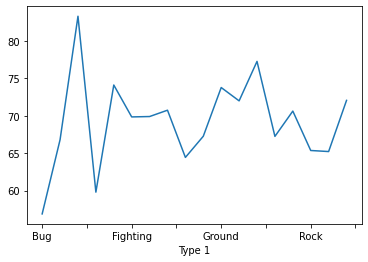

In [37]:
mean_type1 = poke_data.groupby(['Type 1']).mean()
mean_type1['HP'].plot(kind='line');

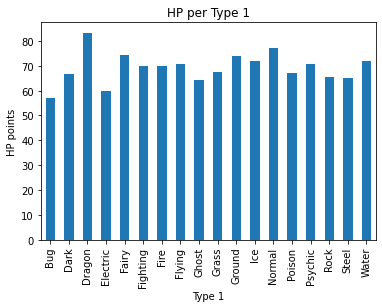

In [38]:
# And a little more readable
mean_type1['HP'].plot(kind='bar',title="HP per Type 1",ylabel='HP points');

## Exercises on the sample sales dataset

* First load in the dataset "SampleSales.csv", located in the working directory.

* How many individual customers do we have? 
* How many orders did we have in Miami? 

* How much profit did we make in the West region? 
* How much profit did we make in total? 
* How much profit did we make, besides California? 
* Make a table-wise overview of the profit per state. 

* What is the most profitable order?

Think about the labels for the x and y-axis and titles!
* Visualise the turnover for each region using a barplot 

In [3]:
pwd = %pwd
sales_data = pd.read_csv(pwd+"/SampleSales.csv")

In [4]:
len(sales_data['Customer ID'].unique())

793

In [5]:
west = sales_data[sales_data['Region']=='West']
west['Profit'].sum()

108418.4489

In [6]:
sales_data['Profit'].sum()

286397.0217

In [7]:
west = sales_data[sales_data['State']!='California']
west['Profit'].sum()

210015.6346

In [8]:
sales_data.groupby(['State']).sum()

,Row ID,Postal Code,Sales,Quantity,Discount,Profit
State,,,,,,
Alabama,243876,2195669,19510.6400,256,0.00,5786.8253
Arizona,1019876,19102126,35282.0010,862,68.00,-3427.9246
Arkansas,304575,4339309,11678.1300,240,0.00,4008.6871
California,10137449,184382639,457687.6315,7667,145.60,76381.3871
Colorado,797002,14613828,32108.1180,693,57.60,-6527.8579
Connecticut,444411,531005,13384.3570,281,0.60,3511.4918
Delaware,504370,1896504,27451.0690,367,0.60,9977.3748
District of Columbia,17918,200160,2865.0200,40,0.00,1059.5893
Florida,1958255,12640225,89473.7080,1379,114.65,-3399.3017


In [9]:
sales_data['Profit'].max()

8399.976

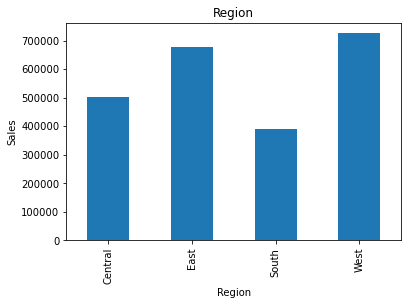

In [10]:
mean_type1 = sales_data.groupby(['Region']).sum()
mean_type1['Sales'].plot(kind='bar',title="Region",ylabel='Sales');

## Extra exercises
Hint: Use Google!

* How much profit did we make, on average, per unit for each customer? (Hint: use the profit, customer ID/name and Quantity columns)

* What percentage of profit did we "lose" on discount for Furniture in 2015 (user order date)? Hint: DateTime is automatically recognised and can be compared as strings. E.g. 01\03\2016>01\06\2017 results in False.

* Visualise the profit for both the consumer and corporate segment using a boxplot

* The SampleSales dataset contains a column "Row ID". Try to load the dataset without this column. 